In [462]:
import numpy as np
import csv

In [463]:
from matplotlib import pyplot as plt


In [464]:
import pandas as pd

In [465]:
train = pd.read_csv("Downloads/house-prices-advanced-regression-techniques/train.csv")

In [466]:
trainArray = train.to_numpy()

In [467]:
test = pd.read_csv("Downloads/house-prices-advanced-regression-techniques/test.csv")
test_id = test ['Id']

In [468]:
testArray = test.to_numpy()

Text(0.5, 1.0, 'Dwelling Type')

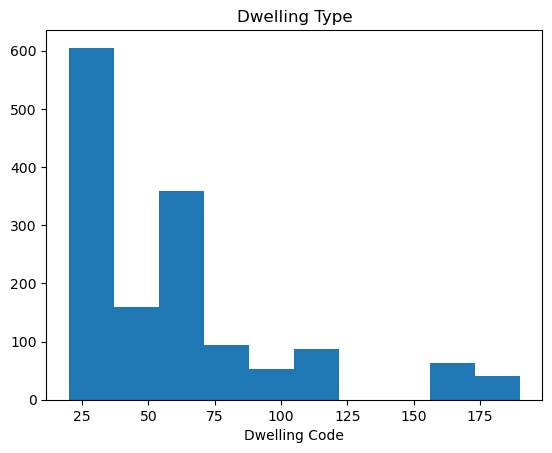

In [469]:
# plot Dwelling Histogram
plt.hist(trainArray[:,1])
plt.xlabel('Dwelling Code')
plt.title('Dwelling Type')

Text(0.5, 1.0, 'House Style')

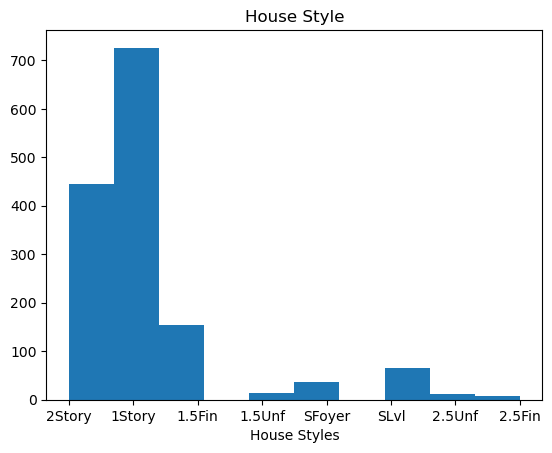

In [470]:
#House Style Histogram 
plt.hist(trainArray[:,16])
plt.xlabel('House Styles')
plt.title('House Style')

In [471]:
# Replacing missing values with a negative number of 100
train = train.fillna(-100)


In [472]:
# Trained to normalize numerical values of all floats and integers  
numeric_columns = list(train.select_dtypes(include = ['int64','float64']))
for column in numeric_columns: 
    train[column] = (train[column] - train[column].mean()) / train[column].std()  

In [473]:

# One- Hot encode for Street
train_new = pd.get_dummies(train, dtype=float, columns=['Street'])


Text(0.5, 0, 'Street Types')

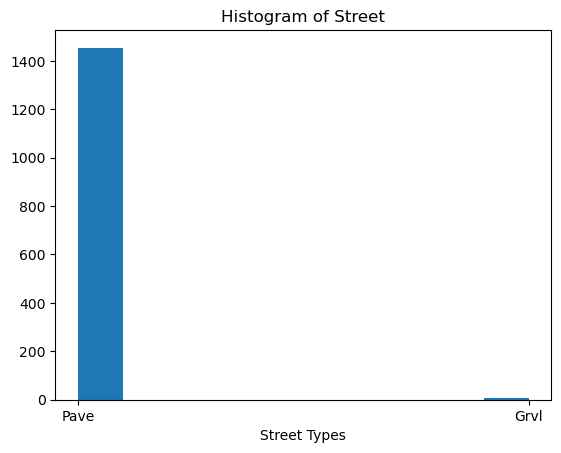

In [474]:
# Histogram before one-hot encoded 
plt.hist(train['Street'])
plt.title('Histogram of Street')
plt.xlabel('Street Types')

In [475]:
train_new

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Grvl,Street_Pave
0,-1.730272,0.073350,RL,0.366060,-0.207071,-100,Reg,Lvl,AllPub,Inside,...,-100,-100,-0.087658,-1.598563,0.138730,WD,Normal,0.347154,0.0,1.0
1,-1.727900,-0.872264,RL,0.584678,-0.091855,-100,Reg,Lvl,AllPub,FR2,...,-100,-100,-0.087658,-0.488943,-0.614228,WD,Normal,0.007286,0.0,1.0
2,-1.725528,0.073350,RL,0.409783,0.073455,-100,IR1,Lvl,AllPub,Inside,...,-100,-100,-0.087658,0.990552,0.138730,WD,Normal,0.535970,0.0,1.0
3,-1.723156,0.309753,RL,0.293187,-0.096864,-100,IR1,Lvl,AllPub,Corner,...,-100,-100,-0.087658,-1.598563,-1.367186,WD,Abnorml,-0.515105,0.0,1.0
4,-1.720785,0.073350,RL,0.642976,0.375020,-100,IR1,Lvl,AllPub,FR2,...,-100,-100,-0.087658,2.100173,0.138730,WD,Normal,0.869545,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.720785,0.073350,RL,0.322336,-0.260471,-100,Reg,Lvl,AllPub,Inside,...,-100,-100,-0.087658,0.620678,-0.614228,WD,Normal,-0.074534,0.0,1.0
1456,1.723156,-0.872264,RL,0.657550,0.266316,-100,Reg,Lvl,AllPub,Inside,...,MnPrv,-100,-0.087658,-1.598563,1.644646,WD,Normal,0.366036,0.0,1.0
1457,1.725528,0.309753,RL,0.380634,-0.147760,-100,Reg,Lvl,AllPub,Inside,...,GdPrv,Shed,4.951415,-0.488943,1.644646,WD,Normal,1.077242,0.0,1.0
1458,1.727900,-0.872264,RL,0.409783,-0.080133,-100,Reg,Lvl,AllPub,Inside,...,-100,-100,-0.087658,-0.858816,1.644646,WD,Normal,-0.488356,0.0,1.0


Text(0.5, 0, 'Street_Gravel')

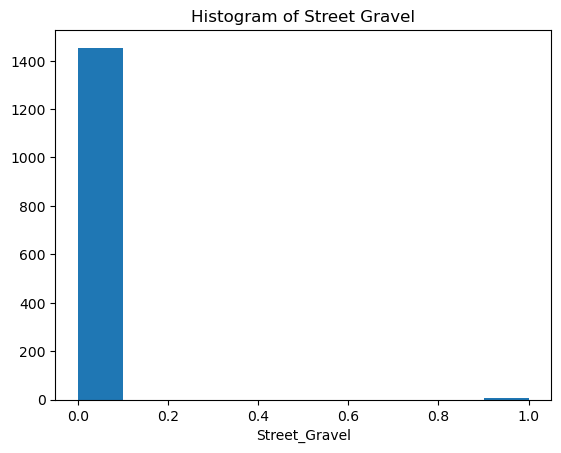

In [476]:
# Histogram before one-hot encoded of Street_Gravel
plt.hist(train_new['Street_Grvl'])
plt.title('Histogram of Street Gravel')
plt.xlabel('Street_Gravel')

Text(0.5, 0, 'Street Paved')

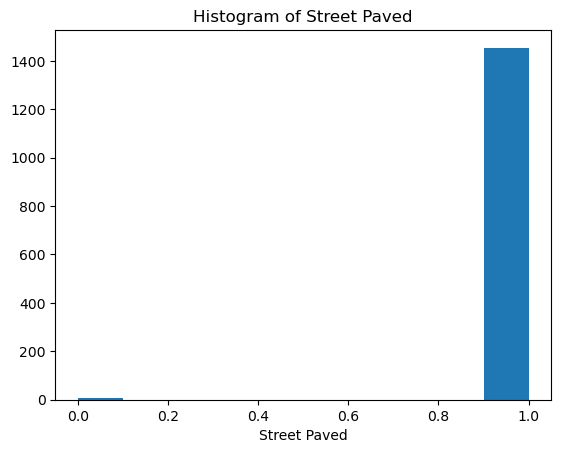

In [477]:
plt.hist(train_new['Street_Pave'])
plt.title('Histogram of Street Paved')
plt.xlabel('Street Paved')

In [478]:
# adding original sale price values in
train_new['SalePrice'] = train_data['SalePrice']

In [479]:
# dropping all columns that are not relavant
train_features = train_new.drop(columns = [
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'MasVnrType',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'Street_Pave',
 'Street_Grvl',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SaleType',
 'SaleCondition',
 'SalePrice']
                 ) 

In [480]:
# for all columns left that are of type "object" (non- numerical) switch out to be numerical columns 
cat_cols = train_features.select_dtypes(include = ['object']).columns
for col in cat_cols: 
    train_features[col] = train_features[col].astype('category')
    train_features[col] = train_features[col].cat.codes

In [481]:
# setting the features into a matrix array 
X_train = train_features.to_numpy()
y_train = train_new['SalePrice'].to_numpy()

In [482]:
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [483]:
# adding a column of ones to add an intercept term 
X_train = np.append(X_train, np.ones(1460).reshape(1460,1), axis=1) 

In [484]:
# normal model 
theta_new = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [485]:
theta_new

array([-7.48488515e+01, -6.66212827e+03, -1.80485961e+03,  2.79243591e+02,
        4.32611485e+03, -2.21832004e+03, -9.36382996e+02,  1.82470724e+02,
        3.38940300e+02, -3.57587632e+02,  1.75783677e+04,  7.70732645e+03,
        7.00075647e+03,  5.29510183e+02,  8.76010300e+02, -9.48091898e+02,
        5.09440819e+02,  4.73353223e+03, -9.28026229e+03, -9.65297403e+02,
       -5.88130340e+03, -2.76312607e+03, -3.42024595e+01,  3.89256281e+03,
       -6.83697472e+02,  1.13948791e+04, -6.69196185e+02, -7.36987023e+01,
        1.19690961e+04,  2.07600275e+04, -1.02980393e+03,  3.23305263e+03,
        3.56542526e+02,  5.39669801e+02, -3.99880383e+03, -7.85072601e+03,
        5.41353989e+03,  6.77238785e+03, -1.50923620e+03,  3.59423771e+02,
       -1.91223731e+03, -2.10360122e+03,  7.35534116e+03,  1.02963517e+03,
        3.37063250e+03,  2.80599255e+03, -1.25738121e+02,  2.88074853e+04,
       -2.02736848e+05, -8.89236657e+00, -2.03176375e+03, -1.44516563e+02,
       -1.23560415e+03,  

In [486]:
# multiplying all the coefficients (weights) times their features to get the predictive array 
y_train_pred = X_train.dot(theta_new)

In [487]:
y_train_pred

array([217217.34453484, 199624.70895138, 220642.89595943, ...,
       252149.93739387, 135910.32407102, 164523.07523022])

In [488]:
mse = np.mean((y_train - y_train_pred) ** 2)

In [489]:
mse

913563842.8748565

In [490]:
# Evaluate Model Performance using R^2 Score
ss_total = np.sum((y_train - np.mean(y_train)) ** 2)
ss_residual = np.sum((y_train - y_train_pred) ** 2)
r2_score = 1 - (ss_residual / ss_total)

In [491]:
# Print Results
print("Coefficients (Theta):", theta_new)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2_score)

Coefficients (Theta): [-7.48488515e+01 -6.66212827e+03 -1.80485961e+03  2.79243591e+02
  4.32611485e+03 -2.21832004e+03 -9.36382996e+02  1.82470724e+02
  3.38940300e+02 -3.57587632e+02  1.75783677e+04  7.70732645e+03
  7.00075647e+03  5.29510183e+02  8.76010300e+02 -9.48091898e+02
  5.09440819e+02  4.73353223e+03 -9.28026229e+03 -9.65297403e+02
 -5.88130340e+03 -2.76312607e+03 -3.42024595e+01  3.89256281e+03
 -6.83697472e+02  1.13948791e+04 -6.69196185e+02 -7.36987023e+01
  1.19690961e+04  2.07600275e+04 -1.02980393e+03  3.23305263e+03
  3.56542526e+02  5.39669801e+02 -3.99880383e+03 -7.85072601e+03
  5.41353989e+03  6.77238785e+03 -1.50923620e+03  3.59423771e+02
 -1.91223731e+03 -2.10360122e+03  7.35534116e+03  1.02963517e+03
  3.37063250e+03  2.80599255e+03 -1.25738121e+02  2.88074853e+04
 -2.02736848e+05 -8.89236657e+00 -2.03176375e+03 -1.44516563e+02
 -1.23560415e+03  2.61925638e+05]
Mean Squared Error (MSE): 913563842.8748565
R^2 Score: 0.8551459541553256


In [492]:
#REPEATING EVERYTHING FOR TEST
test = test.fillna(-100)

In [493]:
test_id 

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [494]:
# Trained to normalize numerical values of all floats and integers  
numeric_columns = list(test.select_dtypes(include = ['int64','float64']))
for column in numeric_columns: 
    test[column] = (test[column] - test[column].mean()) / test[column].std()  

In [495]:
# One- Hot encode for Street
test_new = pd.get_dummies(test, dtype=float, columns=['Street'])

In [496]:
# dropping all columns that are not relavant
test_features = test_new.drop(columns = [
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'MasVnrType',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'Street_Pave',
 'Street_Grvl',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SaleType',
 'SaleCondition']
                 )  

In [497]:
# for all columns left that are of type "object" (non- numerical) switch out to be numerical columns 
cat_cols = test_features.select_dtypes(include = ['object']).columns
for col in cat_cols: 
    test_features[col] = test_features[col].astype('category')
    test_features[col] = test_features[col].cat.codes

In [498]:
# setting the features into a matrix array 
X_test = test_features.to_numpy()

In [499]:
# adding a column of ones to add an intercept term 
X_test = np.append(X_test, np.ones(1459).reshape(1459,1), axis=1) 

In [500]:
y_test_pred = X_test.dot(theta_new)

In [503]:
y_test_pred
len(y_test_pred)

1459

In [502]:
submission = pd.DataFrame({
    'Id': test_id,  # Use the original 'Id' column saved earlier
    'SalePrice': y_test_pred  # Predicted house prices
})

# Ensure 'Id' column is of type integer
submission['Id'] = submission['Id'].astype(int)

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

# Optional: Display the first few rows of the submission
print(submission.head())

Submission file created successfully!
     Id      SalePrice
0  1461  112336.444580
1  1462  167181.708438
2  1463  164330.422985
3  1464  190768.100836
4  1465  177809.946817
